In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors as mcolors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [48]:
tfidf_df = pd.read_csv('tfidf_clusters.csv')

In [31]:
def similarity_matrix(data):
    '''data should be the tfidf matrix plus a column named "cluster" containing the cluster number'''
    data = data.copy(deep = True)
    clusters = data['cluster'].unique()
    cluster_sizes = dict([[c, data[data['cluster'] == c].shape[0]] for c in clusters])
    cumulative_sizes = np.cumsum(sorted(cluster_sizes.values()))    
    data['cluster_size'] = data['cluster'].map(cluster_sizes)
    data_sorted = data.sort_values(by = ['cluster_size', 'cluster']).drop(['cluster', 'cluster_size'], axis = 1)
    distance_matrix = pairwise_distances(data_sorted)
    plt.imshow(distance_matrix, cmap = 'binary')
    plt.yticks(cumulative_sizes, sorted(clusters, key = lambda x: cluster_sizes[x]))
    plt.show()

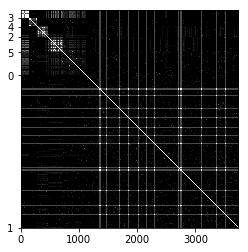

In [50]:
similarity_matrix(tfidf_df)

In [62]:
def silhouette_plot(data):
    '''data should be the tfidf matrix plus a column named "cluster" containing the cluster number'''
    data = data.copy(deep = True)
    clusters = data['cluster']
    data = data.drop(['cluster'], axis = 1)
    cluster_set = clusters.unique()
    nof_clusters = len(cluster_set)
    
    scores = silhouette_samples(data, clusters)
    
    
    
    sorted_clusters = [
                        sorted([scores[i] for i in range(len(scores)) if clusters[i] == c], key = lambda x: -1.0*x) 
                        for c in cluster_set]
    
    sorted_sorted_clusters = sorted(sorted_clusters, key = lambda list_x: -1.0*max(list_x))
    
    sorted_cluster_numbers = sorted(clusters.unique(), key = lambda c: max([scores[i] for i in range(len(scores)) if clusters[i] == c]))
    sorted_cluster_sizes = [len(cluster) for cluster in sorted_sorted_clusters]
    
    cumulative_sizes = np.cumsum(sorted_cluster_sizes)
    
    
    colors = list(mcolors.BASE_COLORS.keys())
    
    if(len(colors) < nof_clusters):
        raise('sry there\'s not enough colors, so sad')
    
    start = 0
    
    for index, cluster in enumerate(sorted_sorted_clusters):
        
        cluster_size = len(cluster)
        
        plt.fill_between(range(start, start + cluster_size), cluster, [0]*cluster_size, color = colors[index])
        
        start += cluster_size
    
    plt.xticks(cumulative_sizes, sorted_cluster_numbers)
    
    plt.show()

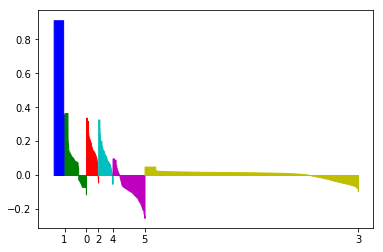

In [63]:
silhouette_plot(tfidf_df)

In [46]:
def pca_plot(data):
    '''data should be the tfidf matrix plus a column named "cluster" containing the cluster number'''
    def most_common_words(data, n): 
        data = data.copy(deep = True)
        words = data.drop(['cluster'], axis = 1).columns
        clusters = data['cluster'].unique()
        word_dict = dict()

        for c in clusters:
            this_cluster = data[data['cluster'] == c].drop(['cluster'], axis = 1)
            mean_vector = np.mean(this_cluster)
            word_importance = dict(zip(words, (-1.0 * mean_vector)))
            sorted_words = sorted(words, key = lambda x: word_importance[x])
            word_dict[c] = sorted_words[:n]

        return word_dict
    
    n = 10
    
    from mpl_toolkits.mplot3d import Axes3D
    from random import choices
    
    clusters = data['cluster']
    
    pca_model = PCA(n_components = 2)
    
    data_pca = pca_model.fit_transform(data.drop(['cluster'], axis = 1))

    colors = list(mcolors.BASE_COLORS.keys())
    
    common_words = most_common_words(data, n)
    
    for c in clusters.unique():
        
        this_cluster = data_pca[clusters == c][:10]
        
        for index, xy in enumerate(this_cluster):
            word = common_words[c][index]
            plt.annotate(word, xy, color = colors[c])
    eps = 0.1
    plt.axis([min(data_pca[:,0]), max(data_pca[:,0]) + eps, min(data_pca[:,1]), max(data_pca[:,1]) + eps])
    plt.show()

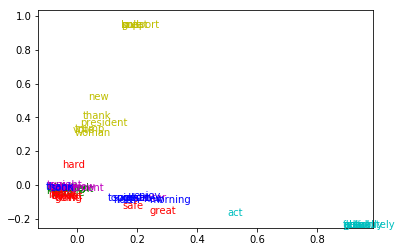

In [53]:
pca_plot(tfidf_df)

In [ ]:
def kmeans_elbow(X, k_values):
    
    inertia_list = []
    
    for k in k_values:        
        model = KMeans(n_clusters = nof_clusters)       
        inertia_list.append(model.fit(tfidf_matrix).inertia_)
        
    plt.plot(k_values, inertia_list)
    plt.show()